In [41]:
# import whisper
import pyaudio
import numpy as np
import wave
import os
import noisereduce as nr
import matplotlib.pyplot as plt
import keyboard
from IPython.display import Audio, display
import time

In [42]:
# Define a word you are going to speak
word = 'sifuri'

# Create a directory for recordings
# output_dir = 'recordings'
output_dir = 'input_audios' + '/' + word
os.makedirs(output_dir, exist_ok=True)

# Get current time in milliseconds (since epoch)
current_time_ms = str(int(time.time() * 1000))

# Define the output file path
output_file = os.path.join(output_dir, current_time_ms + '-og.wav')

In [43]:
# List available input audio devices and their names
p = pyaudio.PyAudio()
print('Available input devices:')
for i in range(p.get_device_count()):
    device_info = p.get_device_info_by_index(i)
    print(f'{i}: {device_info["name"]}')

Available input devices:
0: Microsoft Sound Mapper - Input
1: Mic in at front panel (black) (
2: Stereo Mix (Realtek High Defini
3: Microphone (Realtek High Defini
4: Microsoft Sound Mapper - Output
5: Speaker/Headphone (Realtek High
6: Microphone (Realtek HD Audio Mic input)
7: Speakers (Realtek HD Audio output)
8: Mic in at front panel (black) (Mic in at front panel (black))
9: Stereo Mix (Realtek HD Audio Stereo input)


In [44]:
# Select the desired input device by its ID (replace with the appropriate ID)
selected_device_id = 1  # Change this to the ID of your desired input device

# Record audio from the selected input device
print(f'Recording audio will use device: "{p.get_device_info_by_index(selected_device_id)["name"]}"')

Recording audio will use device: "Mic in at front panel (black) ("


In [45]:
# Function to start recording
def start_recording():
    global recording
    recording = True
    print('Recording audio. Press the space key to stop...')

# Function to stop recording
def stop_recording():
    global recording
    recording = False
    print('Recording stopped.')

# Function to reduce noise from audio
def reduce_noise(audio_data, sample_rate):
    # Apply noise reduction using the noisereduce library
    reduced_audio = nr.reduce_noise(y=audio_data, sr=sample_rate)
    return reduced_audio

# Set the parameters for audio recording
sample_rate = 16000  # You can adjust this based on your needs
duration = 10  # Maximum recording duration in seconds

# Initialize recording status
recording = False
audio = []

# Callback function for audio recording
def audio_callback(in_data, frame_count, time_info, status):
    if recording:
        audio.append(in_data)
    return (in_data, pyaudio.paContinue)

# Initialize PyAudio
p = pyaudio.PyAudio()

# Open an audio stream for recording
stream = p.open(format=pyaudio.paInt16,
                channels=1,
                rate=sample_rate,
                input=True,
                input_device_index=selected_device_id,
                frames_per_buffer=1024,
                stream_callback=audio_callback)

# Wait for the space key to start recording
print('Press the space key to start recording...')
keyboard.wait('space')
start_recording()

# Wait for the space key to stop recording
print('Recording audio. Press the space key to stop...')
keyboard.wait('space')
stop_recording()

# Close the audio stream
stream.stop_stream()
stream.close()
p.terminate()

Press the space key to start recording...
Recording audio. Press the space key to stop...
Recording audio. Press the space key to stop...
Recording stopped.


In [46]:
# Save the recorded audio as a WAV file
if audio:
    audio_data = b''.join(audio)
    with wave.open(output_file, 'wb') as wf:
        wf.setnchannels(1)  # Mono audio
        wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
        wf.setframerate(sample_rate)
        wf.writeframes(audio_data)

    print(f'Audio saved as {output_file}')
else:
    print('No audio recorded.')

# Reduce noise from the recorded audio
if os.path.exists(output_file):
    with wave.open(output_file, 'rb') as wf:
        audio_data = wf.readframes(-1)
        audio_data = np.frombuffer(audio_data, dtype=np.int16)
        sample_rate = wf.getframerate()
    
    # Reduce noise from the recorded audio
    reduced_audio = reduce_noise(audio_data, sample_rate)
    
    # Save the reduced audio
    reduced_output_file = os.path.join(output_dir, current_time_ms + '-clean.wav')
    with wave.open(reduced_output_file, 'wb') as wf:
        wf.setnchannels(1)  # Mono audio
        wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
        wf.setframerate(sample_rate)
        wf.writeframes(reduced_audio.tobytes())
    
    print(f'Noise reduced audio saved as {reduced_output_file}')

Audio saved as input_audios/sifuri\1695650593760-og.wav
Noise reduced audio saved as input_audios/sifuri\1695650593760-clean.wav


Numerical representation of the recorded audio:
[ 833  849  857 ... -856 -832 -818]


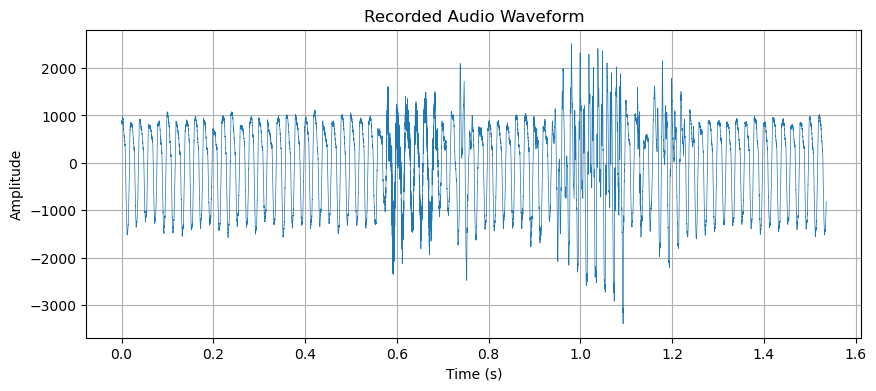

Numerical representation of the reduced audio:
[ 237  268  300 ... -275 -257 -218]


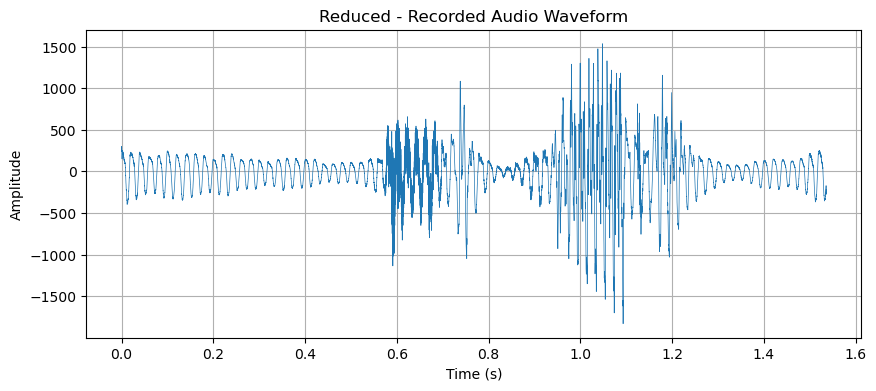

In [47]:
# Load the recorded audio file
audio_file = output_dir + '/' + current_time_ms + '-og.wav'

# Load the reduced audio file
reduced_audio_file = output_dir + '/' + current_time_ms + '-clean.wav'

# Open the audio file if exist
if os.path.exists(output_file):
    with wave.open(audio_file, 'rb') as wf:
        # Get audio data
        audio_data = wf.readframes(-1)
        audio_data = np.frombuffer(audio_data, dtype=np.int16)

        # Get sample rate and duration
        sample_rate = wf.getframerate()
        duration = len(audio_data) / sample_rate

    # Create a time array for x-axis (in seconds)
    time = np.linspace(0, duration, len(audio_data))

    # # Adjust NumPy print options to display the full array without truncation
    # np.set_printoptions(threshold=np.inf)

    # Print the numerical representation of the audio
    print('Numerical representation of the recorded audio:')
    print(audio_data)

    # Plot the audio waveform
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio_data, lw=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Recorded Audio Waveform')
    plt.grid(True)
    plt.show()

    # Play the recorded audio in the notebook
    display(Audio(filename=output_file))

# Open the reduced audio file if exist
if os.path.exists(reduced_output_file):
    with wave.open(reduced_output_file, 'rb') as wf:
        # Get audio data
        audio_data = wf.readframes(-1)
        audio_data = np.frombuffer(audio_data, dtype=np.int16)

        # Get sample rate and duration
        sample_rate = wf.getframerate()
        duration = len(audio_data) / sample_rate

    # Create a time array for x-axis (in seconds)
    time = np.linspace(0, duration, len(audio_data))
    
    # # Adjust NumPy print options to display the full array without truncation
    # np.set_printoptions(threshold=np.inf)

    # Print the numerical representation of the audio
    print('Numerical representation of the reduced audio:')
    print(audio_data)

    # Plot the audio waveform
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio_data, lw=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Reduced - Recorded Audio Waveform')
    plt.grid(True)
    plt.show()

    # # Plot the spectrogram of the reduced audio
    # plt.figure(figsize=(10, 6))
    # plt.specgram(reduced_audio, Fs=sample_rate, cmap='viridis')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Frequency (Hz)')
    # plt.title('Spectrogram of Noise-Reduced Audio')
    # plt.colorbar(label='Intensity (dB)')
    # plt.show()

    # Play the recorded audio in the notebook
    display(Audio(filename=reduced_output_file))